## Level 3

### Task 1: Restaurant Reviews

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
resturant = pd.read_csv("C:/Users/AKASH HN/Downloads/ds internship/Dataset .csv")
data = resturant.dropna()

### Most common positive and negative keywords.

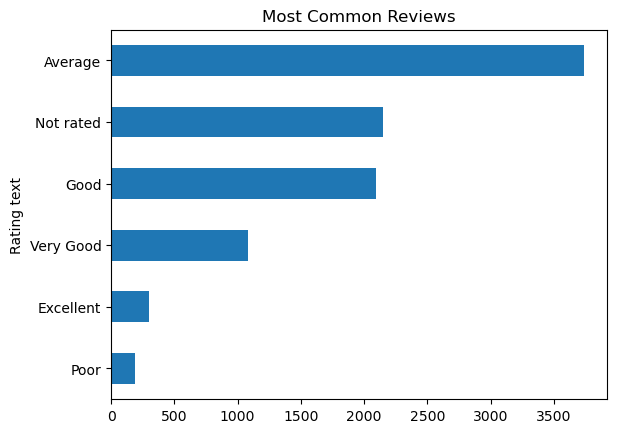

In [49]:
data['Rating text'].value_counts().plot.barh()
plt.title('Most Common Reviews')
plt.gca().invert_yaxis()
plt.show()

### Length of reviews

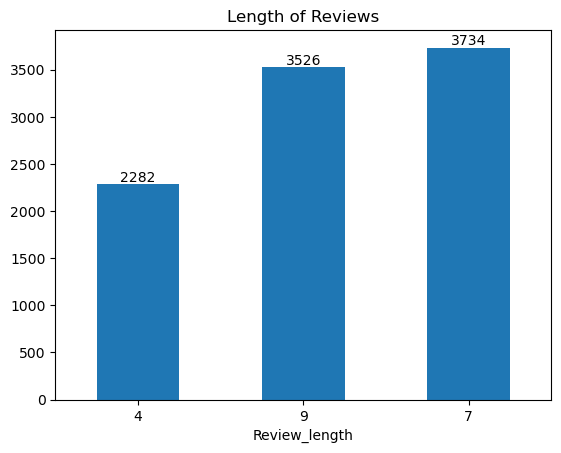

In [50]:
data['Review_length'] = data['Rating text'].str.len()
ax = data['Review_length'].value_counts().plot.bar(rot = 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.title('Length of Reviews')
plt.gca().invert_xaxis()
plt.show()


### Average length of reviews 

In [51]:
print('Average Review lenght')
print(round(data['Review_length'].mean(),0))

Average Review lenght
7.0


### Review length and rating

In [52]:
corr_data = data[['Review_length','Aggregate rating']]
agg_rating = corr_data[corr_data['Aggregate rating'] != 0]
avg_rating = agg_rating.groupby('Review_length')['Aggregate rating'].mean().round(1)
print('Average rating for Review lengths')
avg_rating.sort_values(ascending = False)

Average rating for Review lengths


Review_length
9    4.3
4    3.6
7    3.1
Name: Aggregate rating, dtype: float64

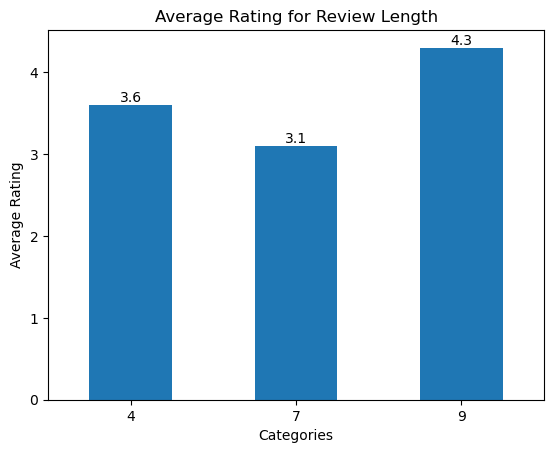

In [53]:
ax = avg_rating.plot.bar(rot = 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.xlabel('Categories')
plt.ylabel('Average Rating')
plt.title('Average Rating for Review Length')
plt.show()

### Relationship between review length and rating.


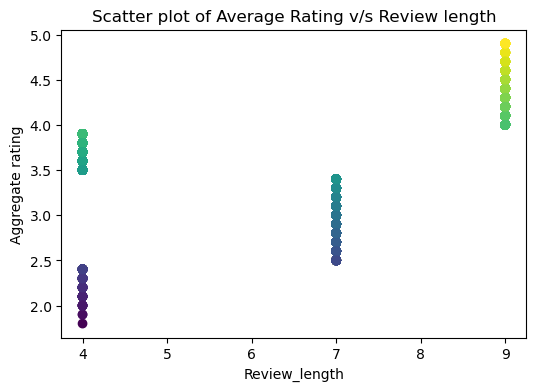

In [54]:
plt.figure(figsize = (6,4))
plt.scatter(agg_rating['Review_length'],agg_rating['Aggregate rating'],c = agg_rating['Aggregate rating'])
plt.title('Scatter plot of Average Rating v/s Review length')
plt.xlabel('Review_length')
plt.ylabel('Aggregate rating')
plt.show()


### Correlationship between review length and rating.


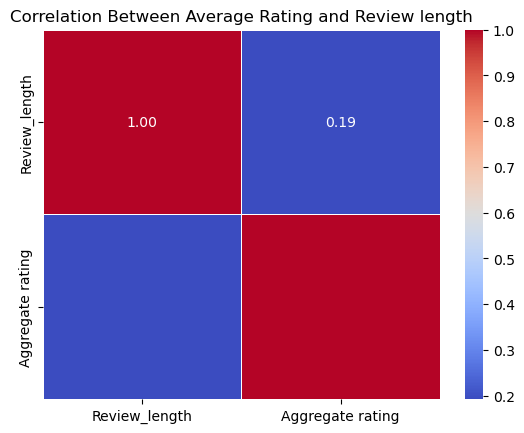

In [55]:
corr = agg_rating.corr()
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)
plt.title('Correlation Between Average Rating and Review length')
plt.show()

In [59]:
r = corr['Review_length'][1]
if r > 0:
    print('There is a Positive relation etween Average Rating and Review length ')
else:
    print('There is a negative relation etween Average Rating and Review length ')

There is a Positive relation etween Average Rating and Review length 


## Task 2: Votes Analysis

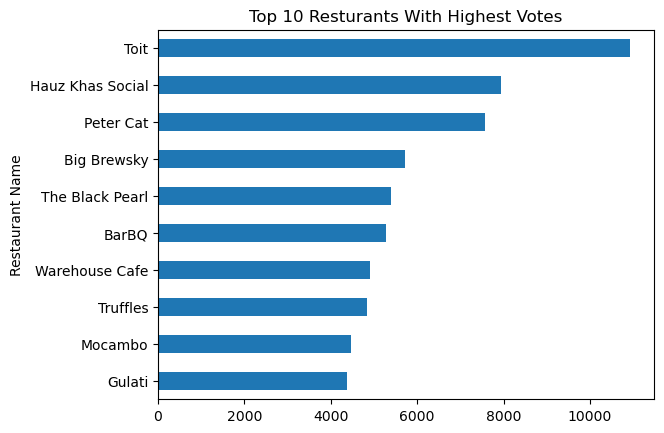

In [23]:
vote_df = data.groupby('Restaurant Name')['Votes'].mean()
vote_df = vote_df.sort_values(ascending = False)
vote_df[:10].plot.barh()
plt.title('Top 10 Resturants With Highest Votes')
plt.gca().invert_yaxis()
plt.show()

In [29]:
vote_df = vote_df[vote_df > 0]
vote_df

Restaurant Name
Toit                   10934.0
Hauz Khas Social        7931.0
Peter Cat               7574.0
Big Brewsky             5705.0
The Black Pearl         5385.0
                        ...   
Delhi Chaat Bhandar        0.5
Pizza King                 0.5
Royal Spice                0.5
The Square Meal            0.5
Biryani Express            0.5
Name: Votes, Length: 6530, dtype: float64

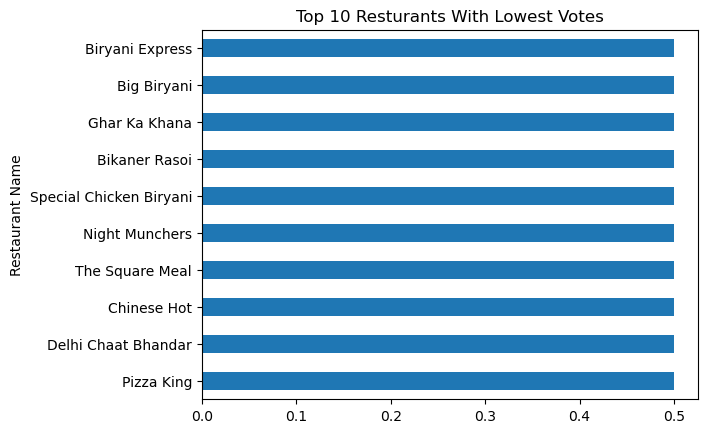

In [31]:
vote_df.sort_values()[:10].plot.barh()
plt.title('Top 10 Resturants With Lowest Votes')
plt.gca().invert_yaxis()
plt.show()

In [33]:
corr_df = data[['Aggregate rating','Votes']]

,Aggregate rating,Votes
0,4.8,314
1,4.5,591
2,4.4,270
3,4.9,365
4,4.8,229
...,...,...
9546,4.1,788
9547,4.2,1034
9548,3.7,661
9549,4.0,901


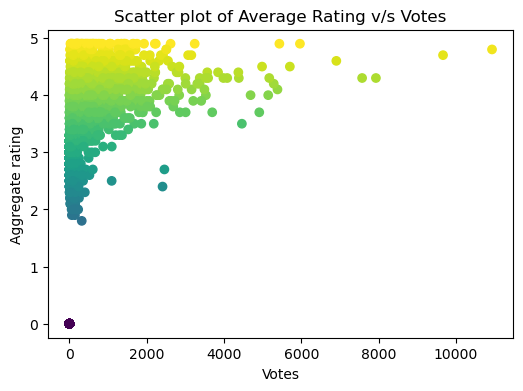

In [60]:
plt.figure(figsize = (6,4))
plt.scatter(corr_df['Votes'],corr_df['Aggregate rating'],c = corr_df['Aggregate rating'])
plt.title('Scatter plot of Average Rating v/s Votes')
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.show()

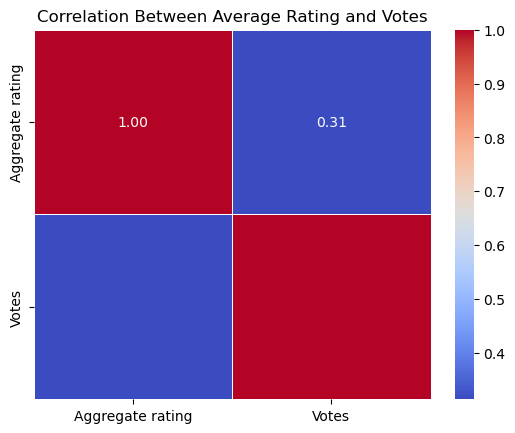

In [63]:
corr = corr_df.corr()
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)
plt.title('Correlation Between Average Rating and Votes')
plt.show()

In [65]:
r = corr['Votes'][0]
if r > 0:
    print('There is a Positive relation between Average Rating and Votes ')
else:
    print('There is a negative relation between Average Rating and Votes ')

There is a Positive relation etween Average Rating and Votes 


## Task 3: Price Range vs. Online Delivery and Table Booking

In [87]:
price_df = data[['Price range','Has Table booking','Has Online delivery']]
price_df

,Price range,Has Table booking,Has Online delivery
0,3,Yes,No
1,3,Yes,No
2,4,Yes,No
3,4,No,No
4,4,Yes,No
...,...,...,...
9546,3,No,No
9547,3,No,No
9548,4,No,No
9549,4,No,No


### Relationship between the price range and the availability of online delivery and table booking.

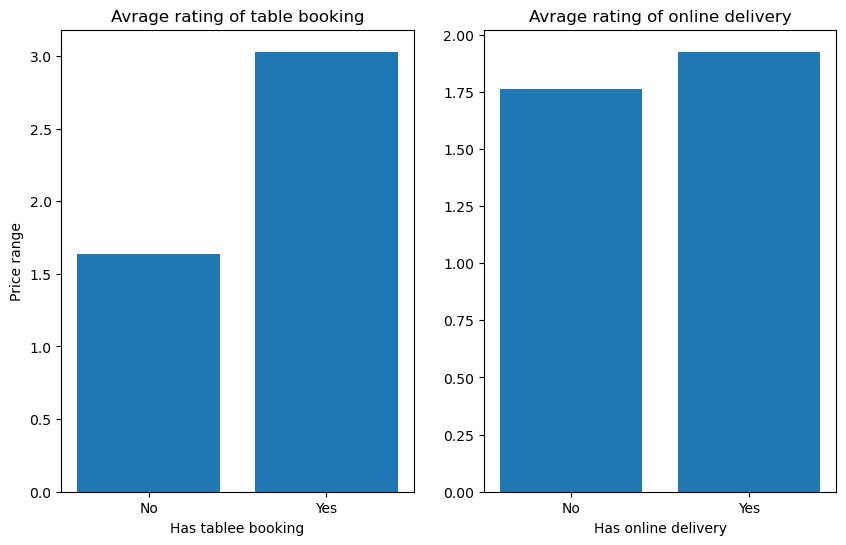

In [169]:
table_book = price_df.groupby('Has Table booking')['Price range'].mean()
fig, ax = plt.subplots(1,2,figsize = (10,6))
ax[0].bar(table_book.index,table_book)
ax[0].set_title('Avrage rating of table booking')
online_delivery = price_df.groupby('Has Online delivery')['Price range'].mean()
ax[1].bar(online_delivery.index,online_delivery)
ax[1].set_title('Avrage rating of online delivery')
ax[0].set_ylabel('Price range')
ax[0].set_xlabel('Has tablee booking')
ax[1].set_xlabel('Has online delivery')
plt.show()



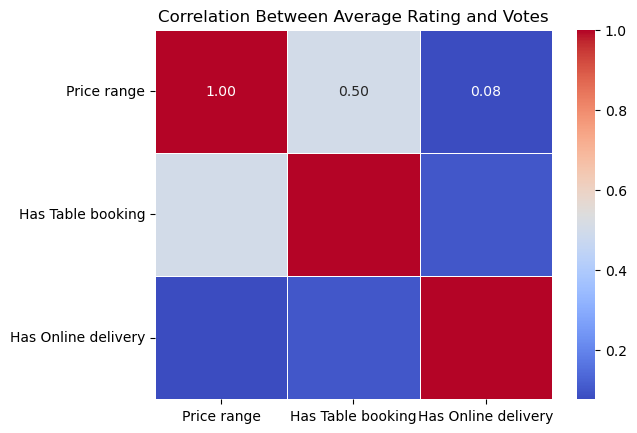

In [107]:
corr = price_df.corr()
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)
plt.title('Correlation Between Average Rating and Votes')
plt.show()

In [156]:
print('Price range has higher correlation with Table booking and lower correlation with Online delivery')

Price range has hogher correlation with Table booking and lower correlation with Online delivery


In [145]:
price_df = data[['Price range','Has Table booking','Has Online delivery']]

In [153]:
price = price_df[price_df['Has Table booking'] == 'Yes']['Price range'].mean()
if price > 3 :
    print('Higher-priced restaurants are more likely to offer Table booking services.')
else:
    print('Higher-priced restaurants are not likely to offer Table booking services.')

Higher-priced restaurants are more likely to offer Table booking services.


In [154]:
price = price_df[price_df['Has Online delivery'] == 'Yes']['Price range'].mean()
if price > 3 :
    print('Higher-priced restaurants are more likely to offer Online delivery services.')
else:
    print('Higher-priced restaurants are not likely to offer Online delivery services.')

Higher-priced restaurants are not likely to offer Online delivery services.
